In [1]:
import parmed as pmd
# Load the python package
import os
import dynetan
from dynetan.toolkit import *
from dynetan.viz import *
from dynetan.proctraj import *
from dynetan.gencor import *
from dynetan.contact import *


# Create the object that processes MD trajectories.
dnap = DNAproc()
dnap2 = DNAproc()

#pip install pytraj
import pytraj as pt
import sys, os
import numpy as np
#pip install mdtraj # Intall MDtraj separately
import mdtraj as md
from mdtraj.testing import get_fn
import platform
import scipy.cluster.hierarchy
from scipy.spatial.distance import squareform
import scipy.stats as stats
import matplotlib.pyplot as plt
import pandas as pd
#import nglview as nv
from scipy.interpolate import griddata
#import moviepy.editor as mpy
import seaborn as sb
# import barnaba
#import barnaba as bb
from statistics import mean, stdev
from pytraj import matrix
from matplotlib import colors
from IPython.display import set_matplotlib_formats
%matplotlib inline
set_matplotlib_formats('png')

/home/aakash/anaconda3/envs/py37/lib/python3.7/site-packages/ipykernel_launcher.py:40: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`


In [2]:
#CREATE YOUR PALLETE WITH RGB COLORS (CODES)
import numpy as np
import matplotlib.pylab as pl

def make_colormap(colors):
    from matplotlib.colors import LinearSegmentedColormap, ColorConverter
    from numpy import sort

    z  = np.array(sorted(colors.keys()))
    n  = len(z)
    z1 = min(z)
    zn = max(z)
    x0 = (z - z1) / (zn - z1)

    CC = ColorConverter()
    R = []
    G = []
    B = []
    for i in range(n):
        Ci = colors[z[i]]      
        if type(Ci) == str:
            RGB = CC.to_rgb(Ci)
        else:
            RGB = Ci
        R.append(RGB[0])
        G.append(RGB[1])
        B.append(RGB[2])

    cmap_dict = {}
    cmap_dict['red']   = [(x0[i],R[i],R[i]) for i in range(len(R))]
    cmap_dict['green'] = [(x0[i],G[i],G[i]) for i in range(len(G))]
    cmap_dict['blue']  = [(x0[i],B[i],B[i]) for i in range(len(B))]
    mymap = LinearSegmentedColormap('mymap',cmap_dict)
    return mymap

test1 = make_colormap({0.:'#40004b',0.5:'#ffffff',1.:'#00441b'}) #CHANGE HERE THE RGB CODES TO CREATE THE NEW CMAP AND CALL IT ON PLOTS (test1)
#test2 = make_colormap({0.:'b',0.25:'w',0.251:'g',0.75:'y',0.751:'r',1:'k'}) 

### tgRNA system: 

In [ ]:
# amber = pmd.load_file('tgRNA/SYS-RNA-ion-wat.prmtop')
# amber.save('tgRNA/SYS-RNA-ion-wat.psf')

In [2]:
# Path where input files will searched and results be written.
workDir = "/mnt/mainpool/storage/SHARED/Project_Cas13a/Analyses/GC/tgRNA"

# PSF file name
psfFile = os.path.join(workDir, "SYS-RNA-ion-wat.psf")

# # DCD file name
# dcdFile = [os.path.join(workDir, "prod_0-100_R1_stride100_onlyProt.dcd")]
# dcdFile2 = [os.path.join(workDir, "prod_0-100_R2_stride100_onlyProt.dcd")]
# dcdFile3 = [os.path.join(workDir, "prod_0-100_R3_stride100_onlyProt.dcd")]

# DCD file name for cluster0
dcdFile = [os.path.join(workDir, "R1_cl0_onlyProt.dcd")]
dcdFile2 = [os.path.join(workDir, "R2_cl0_onlyProt.dcd")]
dcdFile3 = [os.path.join(workDir, "R3_cl0_onlyProt.dcd")]

# dcdFiles = [os.path.join(workDir, "decarboxylase.1.short.dcd")]

#ligandSegID = "OMP"

# Segment IDs for regions that will be studied.
segIDs = ["SYS"]

# Residue name for solvent molecule(s)
#h2oName = ["TIP3"]

# Number of windows created from full simulation.
#numWinds = 10
numWinds = 1 ## for cluster0

# Sampled frames per window
numSampledFrames = 10

# Number of sampled frames for automatic selection of solvent and ions.
# numAutoFrames = numSampledFrames*numWinds

# Network Analysis will make one node per protein residue (in the alpha carbon)
# For other residues, the user must specify atom(s) that will represent a node.
customResNodes = {}
#customResNodes["TIP3"] = ["OH2"]
#customResNodes["OMP"] = ["N1","P"]

# We also need to know the heavy atoms that compose each node group.

usrNodeGroups = {}

#usrNodeGroups["TIP3"] = {}
#usrNodeGroups["TIP3"]["OH2"] = set("OH2 H1 H2".split())

#usrNodeGroups["OMP"] = {}
#usrNodeGroups["OMP"]["N1"] = set("N1 C2 O2 N3 C4 O4 C5 C6 C7 OA OB".split())
#usrNodeGroups["OMP"]["P"] = set("P OP1 OP2 OP3 O5' C5' C4' O4' C1' C3' C2' O2' O3'".split())

#################################
### Extra configuration

# Cutoff for contact map (In Angstroms)
cutoffDist = 100

# Minimum contact persistance (In ratio of total trajectory frames)
contactPersistence = 0

#################################
### Load info to object

dnap.setNumWinds(numWinds)
dnap.setNumSampledFrames(numSampledFrames)
dnap.setCutoffDist(cutoffDist)
dnap.setContactPersistence(contactPersistence)
#dnap.seth2oName(h2oName)
dnap.setSegIDs(segIDs)

dnap.setCustomResNodes(customResNodes)
dnap.setUsrNodeGroups(usrNodeGroups)

# For R1 replica:

In [12]:
dnap.loadSystem(psfFile,dcdFile)
dnap.getU().trajectory

<ChainReader containing R1_cl0_onlyProt.dcd with 706 frames of 19593 atoms>

In [13]:
dnap.prepareNetwork()

Preparing nodes...


Nodes are ready for network analysis.


In [14]:
# If your system is too large, you can turn off the "in memory" option, at a cost for performance.
dnap.alignTraj(inMemory=True)

  0%|          | 0/706 [00:00<?, ?it/s]

In [27]:
# To speed-up the contact matrix calculation, a larger stride can be selected, at a cost for precision.
# dnap.findContacts(stride=2)
dnap.findContacts(stride=50) ## to check whether stride impacts GC

We found 0 nodes with no contacts.
We found 664109 contacting pairs out of 664128 total pairs of nodes.
(That's 100.0%, by the way)


In [28]:
dnap.calcCor(ncores=36)

Calculating correlations...

Using window length of 706 simulation steps.
- > Using multi-core implementation with 36 threads.


In [ ]:
# We can leverage MDanalysis parallelization options with backend="serial" or backend="openmp".
# For very small systems, the serial can be faster!
#-- dnap.calcCartesian(backend="serial") --- # not required for GC matrix

## Accessing GC and saving as np array

In [29]:
n1_R1 = ()
n1_R1 = dnap.corrMatAll

In [30]:
print(n1_R1.shape)

(1, 1153, 1153)


In [31]:
#np.save("tgRNA/GC_2us_stride100_R1.npy", n1_R1)
#np.save("tgRNA/GC_2.5us_cluster0_R1.npy", n1_R1)

In [31]:
n2_R1 = np.load("tgRNA/GC_2us_stride100_R1.npy")
# n2_R1 = np.load("tgRNA/GC_2us_cluster0_R1.npy")
print(n2_R1.shape)

(10, 1153, 1153)


In [33]:
# n2_R1 = np.array(n1_R1)
# print(n2_R1[0].shape)
# print(n2_R1[1].shape)

In [32]:
# R1 = (n2_R1[0]+n2_R1[1]+n2_R1[2]+n2_R1[3]+n2_R1[4]+n2_R1[5]+n2_R1[6]+n2_R1[7]+n2_R1[8]+n2_R1[9]) / 10 ## avg corr from 10 windows
#R1 = (n2_R1[0]+n2_R1[1]) / 2 ## for cluster0
#R1 = n1_R1[0] ## cluster0 - 1 window analysis
R1_1 = (n2_R1[0]+n2_R1[1]+n2_R1[2]+n2_R1[3]+n2_R1[4]) / 5 ## for 1st 1us
R1_2 = (n2_R1[0]+n2_R1[1]+n2_R1[2]) / 3 ## for 1st 600ns
print(np.shape(R1_1))
print(R1_2)

(1153, 1153)
[[0.         0.78338575 0.78025663 ... 0.41521421 0.39594492 0.39467921]
 [0.78338575 0.         0.80651913 ... 0.30516263 0.30170954 0.30156024]
 [0.78025663 0.80651913 0.         ... 0.31983928 0.31888982 0.31579296]
 ...
 [0.41521421 0.30516263 0.31983928 ... 0.         0.8315694  0.83203798]
 [0.39594492 0.30170954 0.31888982 ... 0.8315694  0.         0.82475625]
 [0.39467921 0.30156024 0.31579296 ... 0.83203798 0.82475625 0.        ]]


In [ ]:
#np.save("tgRNA/GC_2us_stride100_R1_avg.npy", R1)
#np.save("tgRNA/GC_2us_cluster0_R1_avg.npy", R1)

In [15]:
# R1_1_2 = (n2_R1[5]+n2_R1[6]+n2_R1[7]+n2_R1[8]+n2_R1[9]) / 5
# np.shape(R1_1_2)
# # print(R1)
# #np.save("tgRNA/GC_2us_stride100_R1_avg.npy", R1)

(1153, 1153)

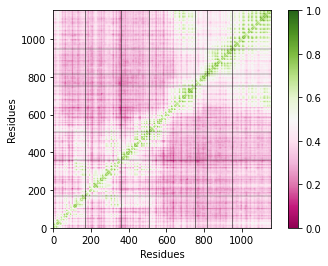

In [33]:
#2D matrix
#plt.imshow(R1_scaled, cmap = 'PiYG', vmin = 0, vmax = 1)
#plt.imshow(R1_1, cmap = 'PiYG', vmin = 0, vmax = 1)
plt.imshow(R1_2, cmap = 'PiYG', vmin = 0, vmax = 1)
#plt.imshow(n2_R1_scaled, cmap = 'PiYG', vmin = 0, vmax = 1)
#plt.imshow(R1_1_2, cmap = 'PiYG', vmin = 0, vmax = 1)
plt.axis([0,1153, 0, 1153])
# Vertical Lines
plt.plot([170, 170], [0, 1153], 'k', lw=0.5)
plt.plot([360, 360], [0, 1153], 'k', lw=0.5)
plt.plot([508, 508], [0, 1153], 'k', lw=0.5)
plt.plot([751, 751], [0, 1153], 'k', lw=0.5)
plt.plot([813, 813], [0, 1153], 'k', lw=0.5)
plt.plot([946, 946], [0, 1153], 'k', lw=0.5)
# Horizontal lines
plt.plot([0, 1153], [170, 170], 'k', lw=0.3)
plt.plot([0, 1153], [360, 360], 'k', lw=0.3)
plt.plot([0, 1153], [508, 508], 'k', lw=0.3)
plt.plot([0, 1153], [751, 751], 'k', lw=0.3)
plt.plot([0, 1153], [813, 813], 'k', lw=0.3)
plt.plot([0, 1153], [946, 946], 'k', lw=0.3)
plt.xlabel('Residues')
plt.ylabel('Residues')
plt.colorbar()
#plt.savefig("tgRNA/GC_2us_stride100_R1.png", dpi=300)
#plt.savefig("tgRNA/GC_200ns_stride100_R1_PA.png", dpi=300)
#plt.savefig("tgRNA/GC_1-2us_stride100_R1.png", dpi=300)
#plt.savefig("tgRNA/GC_2.5us_cluster0_R1.png", dpi=300)

In [51]:
#R1 = np.load("tgRNA/GC_2us_stride100_R1_avg.npy")

## For R2 replica:

In [36]:
dnap.loadSystem(psfFile,dcdFile2)
dnap.getU().trajectory
dnap.prepareNetwork()
dnap.alignTraj(inMemory=True)
dnap.findContacts(stride=50)

Preparing nodes...


Nodes are ready for network analysis.


  0%|          | 0/720 [00:00<?, ?it/s]

We found 0 nodes with no contacts.
We found 663980 contacting pairs out of 664128 total pairs of nodes.
(That's 100.0%, by the way)


In [37]:
dnap.calcCor(ncores=36)

Calculating correlations...

Using window length of 720 simulation steps.
- > Using multi-core implementation with 36 threads.


## Accessing GC and saving as np array

In [38]:
n1_R2 = ()
n1_R2 = dnap.corrMatAll

In [39]:
print(n1_R2.shape)

(1, 1153, 1153)


In [40]:
#np.save("tgRNA/GC_2us_stride100_R2.npy", n1_R2)
# np.save("tgRNA/GC_2.5us_cluster0_R2.npy", n1_R2)

In [34]:
n2_R2 = np.load("tgRNA/GC_2us_stride100_R2.npy")
# n2_R2 = np.load("tgRNA/GC_2us_cluster0_R2.npy")
print(n2_R2.shape)

(10, 1153, 1153)


In [42]:
# n2_R2 = np.array(n1_R2)
# print(n2_R2[0].shape)
# print(n2_R2[1].shape)

In [35]:
#R2 = (n2_R2[0]+n2_R2[1]+n2_R2[2]+n2_R2[3]+n2_R2[4]+n2_R2[5]+n2_R2[6]+n2_R2[7]+n2_R2[8]+n2_R2[9]) / 10 ## avg corr from 2 windows
#R2 = (n2_R2[0]+n2_R2[1]) / 2 ## for cluster0
#R2 = n1_R2[0] ## cluster0 - 1 window analysis
R2_1 = (n2_R2[0]+n2_R2[1]+n2_R2[2]+n2_R2[3]+n2_R2[4]) / 5 ## for 1st 1us
R2_2 = (n2_R2[0]+n2_R2[1]+n2_R2[2]) / 3 ## for 1st 600ns
# np.shape(R2)
# print(R2)
#np.save("tgRNA/GC_2us_stride100_R2_avg.npy", R2)
#np.save("tgRNA/GC_2us_cluster0_R2_avg.npy", R2)

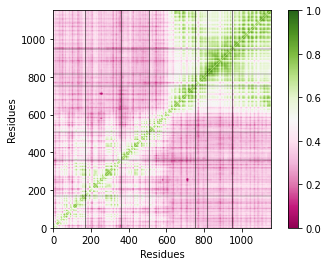

In [36]:
#2D matrix
#plt.imshow(R2_scaled, cmap = 'PiYG', vmin = 0, vmax = 1)
#plt.imshow(R2_1, cmap = 'PiYG', vmin = 0, vmax = 1)
plt.imshow(R2_2, cmap = 'PiYG', vmin = 0, vmax = 1)
plt.axis([0,1153, 0, 1153])
# Vertical Lines
plt.plot([170, 170], [0, 1153], 'k', lw=0.5)
plt.plot([360, 360], [0, 1153], 'k', lw=0.5)
plt.plot([508, 508], [0, 1153], 'k', lw=0.5)
plt.plot([751, 751], [0, 1153], 'k', lw=0.5)
plt.plot([813, 813], [0, 1153], 'k', lw=0.5)
plt.plot([946, 946], [0, 1153], 'k', lw=0.5)
# Horizontal lines
plt.plot([0, 1153], [170, 170], 'k', lw=0.3)
plt.plot([0, 1153], [360, 360], 'k', lw=0.3)
plt.plot([0, 1153], [508, 508], 'k', lw=0.3)
plt.plot([0, 1153], [751, 751], 'k', lw=0.3)
plt.plot([0, 1153], [813, 813], 'k', lw=0.3)
plt.plot([0, 1153], [946, 946], 'k', lw=0.3)
plt.xlabel('Residues')
plt.ylabel('Residues')
plt.colorbar()
#plt.savefig("tgRNA/GC_2us_stride100_R2.png", dpi=300)
#plt.savefig("tgRNA/GC_2.5us_cluster0_R2.png", dpi=300)

In [63]:
#R2 = np.load("tgRNA/GC_2us_stride100_R2_avg.npy")

## For R3 replica:

In [45]:
dnap.loadSystem(psfFile,dcdFile3)
dnap.getU().trajectory
dnap.prepareNetwork()
dnap.alignTraj(inMemory=True)
dnap.findContacts(stride=50)

Preparing nodes...


Nodes are ready for network analysis.


  0%|          | 0/597 [00:00<?, ?it/s]

We found 0 nodes with no contacts.
We found 664057 contacting pairs out of 664128 total pairs of nodes.
(That's 100.0%, by the way)


In [46]:
dnap.calcCor(ncores=36)

Calculating correlations...

Using window length of 597 simulation steps.
- > Using multi-core implementation with 36 threads.


## Accessing GC and saving as np array

In [47]:
n1_R3 = ()
n1_R3 = dnap.corrMatAll

In [48]:
print(n1_R3.shape)

(1, 1153, 1153)


In [49]:
#np.save("tgRNA/GC_2us_stride100_R3.npy", n1_R3)
#np.save("tgRNA/GC_2.5us_cluster0_R3.npy", n1_R3)

In [37]:
n2_R3 = np.load("tgRNA/GC_2us_stride100_R3.npy")
# n2_R3 = np.load("tgRNA/GC_2us_cluster0_R3.npy")
print(n2_R3.shape)

(10, 1153, 1153)


In [51]:
# n2_R3 = np.array(n1_R3)
# print(n2_R3[0].shape)
# print(n2_R3[1].shape)

In [38]:
#R3 = (n2_R3[0]+n2_R3[1]+n2_R3[2]+n2_R3[3]+n2_R3[4]+n2_R3[5]+n2_R3[6]+n2_R3[7]+n2_R3[8]+n2_R3[9]) / 10 ## avg corr from 2 windows
#R3 = (n2_R3[0]+n2_R3[1]) / 2 ## for cluster0
#R3 = n1_R3[0] ## cluster0 - 1 window analysis
R3_1 = (n2_R3[0]+n2_R3[1]+n2_R3[2]+n2_R3[3]+n2_R3[4]) / 5 ## for 1st 1us
R3_2 = (n2_R3[0]+n2_R3[1]+n2_R3[2]) / 3 ## for 1st 600ns
# np.shape(R3)
# print(R3)
#np.save("tgRNA/GC_2us_stride100_R3_avg.npy", R3)
#np.save("tgRNA/GC_2us_cluster0_R3_avg.npy", R3)

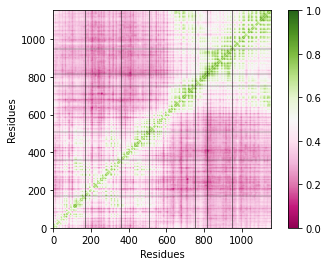

In [39]:
#2D matrix
#plt.imshow(R3_scaled, cmap = 'PiYG', vmin = 0, vmax = 1)
#plt.imshow(R3_1, cmap = 'PiYG', vmin = 0, vmax = 1)
plt.imshow(R3_2, cmap = 'PiYG', vmin = 0, vmax = 1)
plt.axis([0,1153, 0, 1153])
# Vertical Lines
plt.plot([170, 170], [0, 1153], 'k', lw=0.5)
plt.plot([360, 360], [0, 1153], 'k', lw=0.5)
plt.plot([508, 508], [0, 1153], 'k', lw=0.5)
plt.plot([751, 751], [0, 1153], 'k', lw=0.5)
plt.plot([813, 813], [0, 1153], 'k', lw=0.5)
plt.plot([946, 946], [0, 1153], 'k', lw=0.5)
# Horizontal lines
plt.plot([0, 1153], [170, 170], 'k', lw=0.3)
plt.plot([0, 1153], [360, 360], 'k', lw=0.3)
plt.plot([0, 1153], [508, 508], 'k', lw=0.3)
plt.plot([0, 1153], [751, 751], 'k', lw=0.3)
plt.plot([0, 1153], [813, 813], 'k', lw=0.3)
plt.plot([0, 1153], [946, 946], 'k', lw=0.3)
plt.xlabel('Residues')
plt.ylabel('Residues')
plt.colorbar()
#plt.savefig("tgRNA/GC_2us_stride100_R3.png", dpi=300)
#plt.savefig("tgRNA/GC_2.5us_cluster0_R3.png", dpi=300)

In [54]:
#R3 = np.load("tgRNA/GC_2us_stride100_R3_avg.npy")

## Average of 3 reps:

In [54]:
#tgRNA = (R1_scaled + R2_scaled + R3_scaled) / 3
tgRNA = (R1_1 + R2_1 + R3_1) / 3

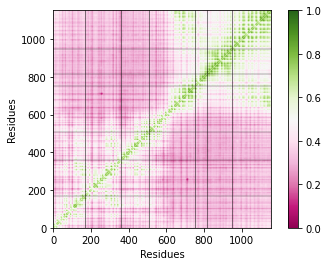

In [41]:
#2D matrix
plt.imshow(tgRNA, cmap = 'PiYG', vmin = 0, vmax = 1)
plt.axis([0,1153, 0, 1153])
# Vertical Lines
plt.plot([170, 170], [0, 1153], 'k', lw=0.5)
plt.plot([360, 360], [0, 1153], 'k', lw=0.5)
plt.plot([508, 508], [0, 1153], 'k', lw=0.5)
plt.plot([751, 751], [0, 1153], 'k', lw=0.5)
plt.plot([813, 813], [0, 1153], 'k', lw=0.5)
plt.plot([946, 946], [0, 1153], 'k', lw=0.5)
# Horizontal lines
plt.plot([0, 1153], [170, 170], 'k', lw=0.3)
plt.plot([0, 1153], [360, 360], 'k', lw=0.3)
plt.plot([0, 1153], [508, 508], 'k', lw=0.3)
plt.plot([0, 1153], [751, 751], 'k', lw=0.3)
plt.plot([0, 1153], [813, 813], 'k', lw=0.3)
plt.plot([0, 1153], [946, 946], 'k', lw=0.3)
plt.xlabel('Residues')
plt.ylabel('Residues')
plt.colorbar()
plt.savefig("tgRNA/GC_600ns_stride100_tgRNA.png", dpi=300)
#plt.savefig("tgRNA/GC_2.5us_cluster0_tgRNA.png", dpi=300)

### crRNA system: 

In [ ]:
# amber = pmd.load_file('tgRNA/SYS-RNA-ion-wat.prmtop')
# amber.save('tgRNA/SYS-RNA-ion-wat.psf')

In [58]:
# Path where input files will searched and results be written.
workDir = "/mnt/mainpool/storage/SHARED/Project_Cas13a/Analyses/GC/crRNA"

# PSF file name
psfFile = os.path.join(workDir, "SYS-RNA-ion-wat.psf")
# # DCD file name
# dcdFile = [os.path.join(workDir, "prod_0-100_R1_stride100_onlyProt.dcd")]
# dcdFile2 = [os.path.join(workDir, "prod_0-100_R2_stride100_onlyProt.dcd")]
# dcdFile3 = [os.path.join(workDir, "prod_0-100_R3_stride100_onlyProt.dcd")]

# DCD file name for cluster0
dcdFile = [os.path.join(workDir, "R1_cl0_onlyProt.dcd")]
dcdFile2 = [os.path.join(workDir, "R2_cl0_onlyProt.dcd")]
dcdFile3 = [os.path.join(workDir, "R3_cl0_onlyProt.dcd")]
# dcdFiles = [os.path.join(workDir, "decarboxylase.1.short.dcd")]

#ligandSegID = "OMP"

# Segment IDs for regions that will be studied.
segIDs = ["SYS"]

# Residue name for solvent molecule(s)
#h2oName = ["TIP3"]

# Number of windows created from full simulation.
#numWinds = 10
numWinds = 1 ## cluster0

# Sampled frames per window
numSampledFrames = 10

# Number of sampled frames for automatic selection of solvent and ions.
# numAutoFrames = numSampledFrames*numWinds

# Network Analysis will make one node per protein residue (in the alpha carbon)
# For other residues, the user must specify atom(s) that will represent a node.
customResNodes = {}
#customResNodes["TIP3"] = ["OH2"]
#customResNodes["OMP"] = ["N1","P"]

# We also need to know the heavy atoms that compose each node group.

usrNodeGroups = {}

#usrNodeGroups["TIP3"] = {}
#usrNodeGroups["TIP3"]["OH2"] = set("OH2 H1 H2".split())

#usrNodeGroups["OMP"] = {}
#usrNodeGroups["OMP"]["N1"] = set("N1 C2 O2 N3 C4 O4 C5 C6 C7 OA OB".split())
#usrNodeGroups["OMP"]["P"] = set("P OP1 OP2 OP3 O5' C5' C4' O4' C1' C3' C2' O2' O3'".split())

#################################
### Extra configuration

# Cutoff for contact map (In Angstroms)
cutoffDist = 100

# Minimum contact persistance (In ratio of total trajectory frames)
contactPersistence = 0

#################################
### Load info to object

dnap.setNumWinds(numWinds)
dnap.setNumSampledFrames(numSampledFrames)
dnap.setCutoffDist(cutoffDist)
dnap.setContactPersistence(contactPersistence)
#dnap.seth2oName(h2oName)
dnap.setSegIDs(segIDs)

dnap.setCustomResNodes(customResNodes)
dnap.setUsrNodeGroups(usrNodeGroups)

In [59]:
print(workDir)
print(psfFile)
print(dcdFile3)

/mnt/mainpool/storage/SHARED/Project_Cas13a/Analyses/GC/crRNA
/mnt/mainpool/storage/SHARED/Project_Cas13a/Analyses/GC/crRNA/SYS-RNA-ion-wat.psf
['/mnt/mainpool/storage/SHARED/Project_Cas13a/Analyses/GC/crRNA/R3_cl0_onlyProt.dcd']


# For R1 replica:

In [60]:
dnap.loadSystem(psfFile,dcdFile)
dnap.getU().trajectory

<ChainReader containing R1_cl0_onlyProt.dcd with 591 frames of 19593 atoms>

In [61]:
dnap.prepareNetwork()
dnap.alignTraj(inMemory=True)
dnap.findContacts(stride=50)

Preparing nodes...


Nodes are ready for network analysis.


  0%|          | 0/591 [00:00<?, ?it/s]

We found 0 nodes with no contacts.
We found 664107 contacting pairs out of 664128 total pairs of nodes.
(That's 100.0%, by the way)


In [62]:
dnap.calcCor(ncores=36)

Calculating correlations...

Using window length of 591 simulation steps.
- > Using multi-core implementation with 36 threads.


## Accessing GC and saving as np array

In [63]:
n3_R1 = ()
n3_R1 = dnap.corrMatAll

In [64]:
print(n3_R1.shape)

(1, 1153, 1153)


In [65]:
#np.save("crRNA/GC_2us_stride100_R1.npy", n3_R1)
np.save("crRNA/GC_2.5us_cluster0_R1.npy", n3_R1)

In [42]:
n4_R1 = np.load("crRNA/GC_2us_stride100_R1.npy")
print(n4_R1.shape)

(10, 1153, 1153)


In [67]:
# n4_R1 = np.array(n3_R1)
# print(n4_R1[0].shape)
# print(n4_R1[1].shape)

In [68]:
#n4_R1 = np.load("crRNA/GC_2us_stride100_R1.npy")

In [43]:
#cr_R1 = (n4_R1[0]+n4_R1[1]+n4_R1[2]+n4_R1[3]+n4_R1[4]+n4_R1[5]+n4_R1[6]+n4_R1[7]+n4_R1[8]+n4_R1[9]) / 10 ## avg corr from 2 windows
#cr_R1 = (n4_R1[0]+n4_R1[1]) / 2 ## cluster0
#cr_R1 = n3_R1[0] ## cluster0 - 1 window analysis
cr_R1_1 = (n4_R1[0]+n4_R1[1]+n4_R1[2]+n4_R1[3]+n4_R1[4]) / 5 ## for 1st 1us
cr_R1_2 = (n4_R1[0]+n4_R1[1]+n4_R1[2]) / 3 ## for 1st 600ns
# np.shape(cr_R1)
# print(cr_R1)
#np.save("crRNA/GC_2us_stride100_R1_avg.npy", cr_R1)
#np.save("crRNA/GC_2us_cluster0_R1_avg.npy", cr_R1)

In [49]:
# cr_R1_1_2 = (n4_R1[5]+n4_R1[6]+n4_R1[7]+n4_R1[8]+n4_R1[9]) / 5
# np.shape(R1_1_2)
# # print(R1)
# #np.save("tgRNA/GC_2us_stride100_R1_avg.npy", R1)

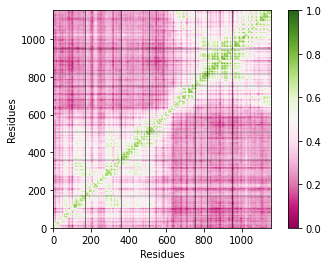

In [44]:
#2D matrix
#plt.imshow(cr_R1_scaled, cmap = 'PiYG', vmin = 0, vmax = 1)
#plt.imshow(cr_R1_1, cmap = 'PiYG', vmin = 0, vmax = 1)
plt.imshow(cr_R1_2, cmap = 'PiYG', vmin = 0, vmax = 1)
#plt.imshow(cr_R1_1_2, cmap = 'PiYG', vmin = 0, vmax = 1)

plt.axis([0,1153, 0, 1153])
# Vertical Lines
plt.plot([170, 170], [0, 1153], 'k', lw=0.5)
plt.plot([360, 360], [0, 1153], 'k', lw=0.5)
plt.plot([508, 508], [0, 1153], 'k', lw=0.5)
plt.plot([751, 751], [0, 1153], 'k', lw=0.5)
plt.plot([813, 813], [0, 1153], 'k', lw=0.5)
plt.plot([946, 946], [0, 1153], 'k', lw=0.5)
# Horizontal lines
plt.plot([0, 1153], [170, 170], 'k', lw=0.3)
plt.plot([0, 1153], [360, 360], 'k', lw=0.3)
plt.plot([0, 1153], [508, 508], 'k', lw=0.3)
plt.plot([0, 1153], [751, 751], 'k', lw=0.3)
plt.plot([0, 1153], [813, 813], 'k', lw=0.3)
plt.plot([0, 1153], [946, 946], 'k', lw=0.3)
plt.xlabel('Residues')
plt.ylabel('Residues')
plt.colorbar()
#plt.savefig("crRNA/GC_2us_stride100_R1.png", dpi=300)
#plt.savefig("crRNA/GC_1-2us_stride100_R1.png", dpi=300)
#plt.savefig("crRNA/GC_2.5us_cluster0_R1.png", dpi=300)

In [70]:
#cr_R1 = np.load("crRNA/GC_2us_stride100_R1_avg.npy")

## For R2 replica:

In [19]:
# Number of windows created from full simulation.
numWinds = 1

# Sampled frames per window
numSampledFrames = 10

dnap.setNumWinds(numWinds)
dnap.setNumSampledFrames(numSampledFrames)

In [71]:
dnap.loadSystem(psfFile,dcdFile2)
dnap.getU().trajectory

<ChainReader containing R2_cl0_onlyProt.dcd with 716 frames of 19593 atoms>

In [72]:
dnap.prepareNetwork()
dnap.alignTraj(inMemory=True)
dnap.findContacts(stride=50)

Preparing nodes...


Nodes are ready for network analysis.


  0%|          | 0/716 [00:00<?, ?it/s]

We found 0 nodes with no contacts.
We found 664107 contacting pairs out of 664128 total pairs of nodes.
(That's 100.0%, by the way)


In [ ]:
dir(dnap)

In [73]:
dnap.calcCor(ncores=36)

Calculating correlations...

Using window length of 716 simulation steps.
- > Using multi-core implementation with 36 threads.


## Accessing GC and saving as np array

In [74]:
n3_R2 = ()
n3_R2 = dnap.corrMatAll

In [75]:
print(n3_R2.shape)

(1, 1153, 1153)


In [85]:
#np.save("crRNA/GC_2us_stride100_R2.npy", n3_R2)
np.save("crRNA/GC_2.5us_cluster0_R2.npy", n3_R2)

In [77]:
# n4_R2 = np.array(n3_R2)
# print(n4_R2[0].shape)
# print(n4_R2[1].shape)

In [45]:
n4_R2 = np.load("crRNA/GC_2us_stride100_R2.npy")
print(n4_R2.shape)

(10, 1153, 1153)


In [79]:
# n4_R2 = np.load("crRNA/GC_2us_cluster0_R2.npy")
# print(n4_R2.shape)

In [46]:
#cr_R2 = (n4_R2[0]+n4_R2[1]+n4_R2[2]+n4_R2[3]+n4_R2[4]+n4_R2[5]+n4_R2[6]+n4_R2[7]+n4_R2[8]) / 9 ## avg corr from 2 windows
#cr_R2 = (n4_R2[0] + n4_R2[1]) / 2 ## cluster0
#cr_R2 = n3_R2[0] ## cluster0 - 1 window analysis
cr_R2_1 = (n4_R2[0]+n4_R2[1]+n4_R2[2]+n4_R2[3]+n4_R2[4]) / 5 ## for 1st 1us
cr_R2_2 = (n4_R2[0]+n4_R2[1]+n4_R2[2]) / 3 ## for 1st 600ns
#np.shape(cr_R2)
#cr_R2 = np.array(n3_R2)
#print(cr_R2)
#np.save("crRNA/GC_2us_stride100_R2_avg.npy", cr_R2)
#np.save("crRNA/GC_2us_cluster0_R2_avg.npy", cr_R2)

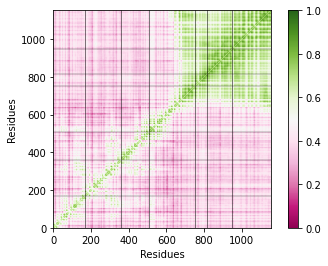

In [47]:
#2D matrix
#plt.imshow(cr_R2_scaled, cmap = 'PiYG', vmin = 0, vmax = 1)
#plt.imshow(cr_R2_1, cmap = 'PiYG', vmin = 0, vmax = 1)
plt.imshow(cr_R2_2, cmap = 'PiYG', vmin = 0, vmax = 1)
plt.axis([0,1153, 0, 1153])
# Vertical Lines
plt.plot([170, 170], [0, 1153], 'k', lw=0.5)
plt.plot([360, 360], [0, 1153], 'k', lw=0.5)
plt.plot([508, 508], [0, 1153], 'k', lw=0.5)
plt.plot([751, 751], [0, 1153], 'k', lw=0.5)
plt.plot([813, 813], [0, 1153], 'k', lw=0.5)
plt.plot([946, 946], [0, 1153], 'k', lw=0.5)
# Horizontal lines
plt.plot([0, 1153], [170, 170], 'k', lw=0.3)
plt.plot([0, 1153], [360, 360], 'k', lw=0.3)
plt.plot([0, 1153], [508, 508], 'k', lw=0.3)
plt.plot([0, 1153], [751, 751], 'k', lw=0.3)
plt.plot([0, 1153], [813, 813], 'k', lw=0.3)
plt.plot([0, 1153], [946, 946], 'k', lw=0.3)
plt.xlabel('Residues')
plt.ylabel('Residues')
plt.colorbar()
#plt.savefig("crRNA/GC_2us_stride100_R2.png", dpi=300)
#plt.savefig("crRNA/GC_2.5us_cluster0_R2.png", dpi=300)

In [75]:
#cr_R2 = np.load("crRNA/GC_2us_stride100_R2_avg.npy")

## For R3 replica:

In [ ]:
# Number of windows created from full simulation.
numWinds = 10

# Sampled frames per window
numSampledFrames = 10

dnap.setNumWinds(numWinds)
dnap.setNumSampledFrames(numSampledFrames)

In [82]:
dnap.loadSystem(psfFile,dcdFile3)
dnap.getU().trajectory

<ChainReader containing R3_cl0_onlyProt.dcd with 912 frames of 19593 atoms>

In [83]:
dnap.prepareNetwork()
dnap.alignTraj(inMemory=True)
dnap.findContacts(stride=50)

Preparing nodes...


Nodes are ready for network analysis.


  0%|          | 0/912 [00:00<?, ?it/s]

We found 0 nodes with no contacts.
We found 664123 contacting pairs out of 664128 total pairs of nodes.
(That's 100.0%, by the way)


In [ ]:
#dir(dnap)

In [84]:
dnap.calcCor(ncores=36)

Calculating correlations...

Using window length of 912 simulation steps.
- > Using multi-core implementation with 36 threads.


## Accessing GC and saving as np array

In [86]:
n3_R3 = ()
n3_R3 = dnap.corrMatAll

In [87]:
print(n3_R3.shape)

(1, 1153, 1153)


In [88]:
#np.save("crRNA/GC_2us_stride100_R3.npy", n3_R3)
np.save("crRNA/GC_2.5us_cluster0_R3.npy", n3_R3)

In [89]:
# n4_R3 = np.array(n3_R3)
# print(n4_R3[0].shape)
# print(n4_R3[1].shape)

In [48]:
n4_R3 = np.load("crRNA/GC_2us_stride100_R3.npy")
print(n4_R3.shape)

(10, 1153, 1153)


In [91]:
# n4_R3 = np.load("crRNA/GC_2us_cluster0_R3.npy")
# print(n4_R3.shape)
# print(n4_R3[0])
# print(n4_R3[1])

In [92]:
# (0.82298918 + 0.78961463)/2

In [49]:
#cr_R3 = (n4_R3[0]+n4_R3[1]+n4_R3[2]+n4_R3[3]+n4_R3[4]+n4_R3[5]+n4_R3[6]+n4_R3[7]+n4_R3[8]+n4_R3[9]) / 10 ## avg corr from 2 windows
#cr_R3 = (n4_R3[0]+n4_R3[1]) / 2 ## avg corr from 2 windows
#cr_R3 = n3_R3[0] ## cluster0 - 1 window analysis
cr_R3_1 = (n4_R3[0]+n4_R3[1]+n4_R3[2]+n4_R3[3]+n4_R3[4]) / 5 ## for 1st 1us
cr_R3_2 = (n4_R3[0]+n4_R3[1]+n4_R3[2]) / 3 ## for 1st 600ns
# print(np.shape(cr_R3))
# print(cr_R3)
#np.save("crRNA/GC_2us_stride100_R3_avg.npy", cr_R3)
#np.save("crRNA/GC_2us_cluster0_R3_avg.npy", cr_R3)

In [94]:
# new = np.load("crRNA/GC_2us_cluster0_R3_avg.npy")
# print(new)

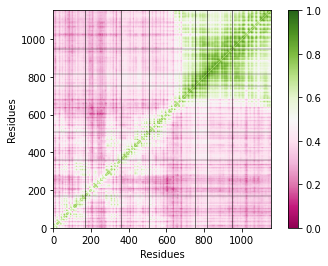

In [50]:
#2D matrix
#plt.imshow(cr_R3_scaled, cmap = 'PiYG', vmin = 0, vmax = 1)
#plt.imshow(cr_R3_1, cmap = 'PiYG', vmin = 0, vmax = 1)
plt.imshow(cr_R3_2, cmap = 'PiYG', vmin = 0, vmax = 1)
plt.axis([0,1153, 0, 1153])
# Vertical Lines
plt.plot([170, 170], [0, 1153], 'k', lw=0.5)
plt.plot([360, 360], [0, 1153], 'k', lw=0.5)
plt.plot([508, 508], [0, 1153], 'k', lw=0.5)
plt.plot([751, 751], [0, 1153], 'k', lw=0.5)
plt.plot([813, 813], [0, 1153], 'k', lw=0.5)
plt.plot([946, 946], [0, 1153], 'k', lw=0.5)
# Horizontal lines
plt.plot([0, 1153], [170, 170], 'k', lw=0.3)
plt.plot([0, 1153], [360, 360], 'k', lw=0.3)
plt.plot([0, 1153], [508, 508], 'k', lw=0.3)
plt.plot([0, 1153], [751, 751], 'k', lw=0.3)
plt.plot([0, 1153], [813, 813], 'k', lw=0.3)
plt.plot([0, 1153], [946, 946], 'k', lw=0.3)
plt.xlabel('Residues')
plt.ylabel('Residues')
plt.colorbar()
#plt.savefig("crRNA/GC_2us_stride100_R3.png", dpi=300)
#plt.savefig("crRNA/GC_2.5us_cluster0_R3.png", dpi=300)

In [96]:
#cr_R3 = np.load("crRNA/GC_2us_stride100_R3_avg.npy")

# Averaging over reps:

In [55]:
crRNA = (cr_R1_1 + cr_R2_1 + cr_R3_1) / 3

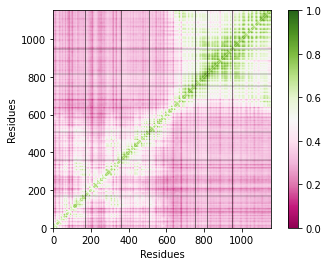

In [44]:
#2D matrix
plt.imshow(crRNA, cmap = 'PiYG', vmin = 0, vmax = 1)
plt.axis([0,1153, 0, 1153])
# Vertical Lines
plt.plot([170, 170], [0, 1153], 'k', lw=0.5)
plt.plot([360, 360], [0, 1153], 'k', lw=0.5)
plt.plot([508, 508], [0, 1153], 'k', lw=0.5)
plt.plot([751, 751], [0, 1153], 'k', lw=0.5)
plt.plot([813, 813], [0, 1153], 'k', lw=0.5)
plt.plot([946, 946], [0, 1153], 'k', lw=0.5)
# Horizontal lines
plt.plot([0, 1153], [170, 170], 'k', lw=0.3)
plt.plot([0, 1153], [360, 360], 'k', lw=0.3)
plt.plot([0, 1153], [508, 508], 'k', lw=0.3)
plt.plot([0, 1153], [751, 751], 'k', lw=0.3)
plt.plot([0, 1153], [813, 813], 'k', lw=0.3)
plt.plot([0, 1153], [946, 946], 'k', lw=0.3)
plt.xlabel('Residues')
plt.ylabel('Residues')
plt.colorbar()
plt.savefig("crRNA/GC_1us_stride100_crRNA.png", dpi=300)
#plt.savefig("crRNA/GC_2.5us_cluster0_crRNA.png", dpi=300)

In [45]:
tgRNA_flat = tgRNA.flatten()
crRNA_flat = crRNA.flatten()

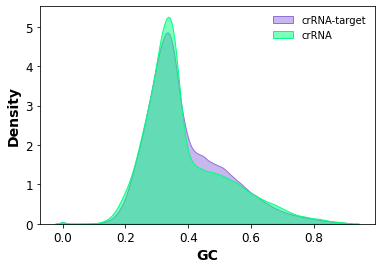

In [46]:
#plt.figure(figsize=(5,7))
ax = sb.kdeplot(tgRNA_flat, color="mediumpurple", shade=True, alpha=0.5, linewidth=1, label = 'crRNA-target')
ax = sb.kdeplot(crRNA_flat, color="springgreen", shade=True, alpha=0.5, linewidth=1, label = 'crRNA')
#Setting the border of the box
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
#plt.axis([6500, 8500, 0, 0.0025])
# plt.xlim(4000, 6500)
plt.xlabel("GC", fontname = 'Arial', fontsize = 14, fontweight = 'bold')
plt.ylabel("Density", fontname = 'Arial', fontsize = 14, fontweight = 'bold')
plt.xticks(fontname = 'Arial', fontsize = 12)
plt.yticks(fontname = 'Arial', fontsize = 12)
plt.legend(frameon=False)
#plt.savefig("GC-Distribution.png", dpi=600)
plt.savefig("GC-1us-crRNA_tgRNA-Distribution.png", dpi=600)

### atgRNA system: 

In [ ]:
# amber = pmd.load_file('tgRNA/SYS-RNA-ion-wat.prmtop')
# amber.save('tgRNA/SYS-RNA-ion-wat.psf')

In [2]:
# Path where input files will searched and results be written.
workDir = "/mnt/mainpool/storage/SHARED/Project_Cas13a/Analyses/GC/atgRNA"

# PSF file name
psfFile = os.path.join(workDir, "SYS-RNA-ion-wat.psf")
# # DCD file name
dcdFile = [os.path.join(workDir, "prod_0-100_R1_stride100_onlyProt.dcd")]
dcdFile2 = [os.path.join(workDir, "prod_0-100_R2_stride100_onlyProt.dcd")]
dcdFile3 = [os.path.join(workDir, "prod_0-100_R3_stride100_onlyProt.dcd")]

# DCD file name for cluster0
# dcdFile = [os.path.join(workDir, "R1_cl0_onlyProt.dcd")]
# dcdFile2 = [os.path.join(workDir, "R2_cl0_onlyProt.dcd")]
# dcdFile3 = [os.path.join(workDir, "R3_cl0_onlyProt.dcd")]
# dcdFiles = [os.path.join(workDir, "decarboxylase.1.short.dcd")]

#ligandSegID = "OMP"

# Segment IDs for regions that will be studied.
segIDs = ["SYS"]

# Residue name for solvent molecule(s)
#h2oName = ["TIP3"]

# Number of windows created from full simulation.
numWinds = 10
# numWinds = 2 ## cluster0

# Sampled frames per window
numSampledFrames = 10

# Number of sampled frames for automatic selection of solvent and ions.
# numAutoFrames = numSampledFrames*numWinds

# Network Analysis will make one node per protein residue (in the alpha carbon)
# For other residues, the user must specify atom(s) that will represent a node.
customResNodes = {}
#customResNodes["TIP3"] = ["OH2"]
#customResNodes["OMP"] = ["N1","P"]

# We also need to know the heavy atoms that compose each node group.

usrNodeGroups = {}

#usrNodeGroups["TIP3"] = {}
#usrNodeGroups["TIP3"]["OH2"] = set("OH2 H1 H2".split())

#usrNodeGroups["OMP"] = {}
#usrNodeGroups["OMP"]["N1"] = set("N1 C2 O2 N3 C4 O4 C5 C6 C7 OA OB".split())
#usrNodeGroups["OMP"]["P"] = set("P OP1 OP2 OP3 O5' C5' C4' O4' C1' C3' C2' O2' O3'".split())

#################################
### Extra configuration

# Cutoff for contact map (In Angstroms)
cutoffDist = 100

# Minimum contact persistance (In ratio of total trajectory frames)
contactPersistence = 0

#################################
### Load info to object

dnap.setNumWinds(numWinds)
dnap.setNumSampledFrames(numSampledFrames)
dnap.setCutoffDist(cutoffDist)
dnap.setContactPersistence(contactPersistence)
#dnap.seth2oName(h2oName)
dnap.setSegIDs(segIDs)

dnap.setCustomResNodes(customResNodes)
dnap.setUsrNodeGroups(usrNodeGroups)

In [48]:
print(workDir)
print(psfFile)
print(dcdFile)

/mnt/mainpool/storage/SHARED/Project_Cas13a/Analyses/GC/atgRNA
/mnt/mainpool/storage/SHARED/Project_Cas13a/Analyses/GC/atgRNA/SYS-RNA-ion-wat.psf
['/mnt/mainpool/storage/SHARED/Project_Cas13a/Analyses/GC/atgRNA/prod_0-100_R1_stride100_onlyProt.dcd']


# For R1 replica:

In [49]:
dnap.loadSystem(psfFile,dcdFile)
dnap.getU().trajectory

<ChainReader containing prod_0-100_R1_stride100_onlyProt.dcd with 1980 frames of 19593 atoms>

In [50]:
dnap.prepareNetwork()
dnap.alignTraj(inMemory=True)
dnap.findContacts(stride=50)

Preparing nodes...


Nodes are ready for network analysis.


  0%|          | 0/1980 [00:00<?, ?it/s]

We found 0 nodes with no contacts.
We found 664025 contacting pairs out of 664128 total pairs of nodes.
(That's 100.0%, by the way)


In [51]:
dnap.calcCor(ncores=12) ## done upto 8 the window

Calculating correlations...

Using window length of 198 simulation steps.
- > Using multi-core implementation with 12 threads.


Process Process-94:
Traceback (most recent call last):
  File "/home/aakash/anaconda3/envs/py37/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/aakash/anaconda3/envs/py37/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/aakash/anaconda3/envs/py37/lib/python3.7/site-packages/dynetan/gencor.py", line 192, in calcCorProc
    atmList = inQueue.get()
  File "/home/aakash/anaconda3/envs/py37/lib/python3.7/multiprocessing/queues.py", line 94, in get
    res = self._recv_bytes()
  File "/home/aakash/anaconda3/envs/py37/lib/python3.7/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/home/aakash/anaconda3/envs/py37/lib/python3.7/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/home/aakash/anaconda3/envs/py37/lib/python3.7/multiprocessing/connection.py", line 379, in _recv
    chunk = rea

KeyboardInterrupt: 

## Accessing GC and saving as np array

In [52]:
n5_R1 = ()
n5_R1 = dnap.corrMatAll

In [53]:
print(n5_R1.shape)

(10, 1153, 1153)


In [60]:
print(n5_R1[8])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [61]:
np.save("atgRNA/GC_2us_stride100_R1.npy", n5_R1) ## only upto 1.6us
#np.save("atgRNA/GC_2us_cluster0_R1.npy", n5_R1)

In [17]:
n6_R1 = np.load("atgRNA/GC_2us_stride100_R1.npy")
print(n6_R1.shape)

(10, 1153, 1153)


In [18]:
# n6_R1 = np.array(n5_R1)
# print(n6_R1[0].shape)
# # print(n6_R1[1].shape)

In [19]:
# n6_R1 = np.load("atgRNA/GC_2us_stride100_R1.npy")
# print(n6_R1.shape)

In [20]:
#atg_R1 = (n4_R1[0]+n4_R1[1]+n4_R1[2]+n4_R1[3]+n4_R1[4]+n4_R1[5]+n4_R1[6]+n4_R1[7]+n4_R1[8]+n4_R1[9]) / 10 ## avg corr from 2 windows
#atg_R1 = (n6_R1[0]+n6_R1[1]) / 2 ## cluster0
atg_R1_1 = (n6_R1[0]+n6_R1[1]+n6_R1[2]+n6_R1[3]+n6_R1[4]) / 5 ## for 1st 1us
atg_R1_2 = (n6_R1[0]+n6_R1[1]+n6_R1[2]) / 3 ## for 1st 600ns
# np.shape(atg_R1)
# print(atg_R1)
#np.save("atgRNA/GC_2us_stride100_R1_avg.npy", atg_R1)
#np.save("atgRNA/GC_2us_cluster0_R1_avg.npy", atg_R1)

In [68]:
# print(np.load("atgRNA/GC_2us_cluster0_R1_avg.npy"))

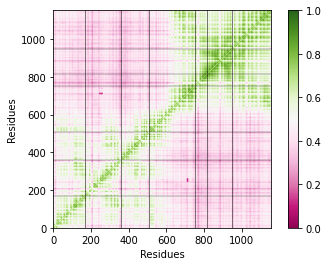

In [21]:
#2D matrix
#plt.imshow(atg_R1_scaled, cmap = 'PiYG', vmin = 0, vmax = 1)
#plt.imshow(atg_R1_1, cmap = 'PiYG', vmin = 0, vmax = 1)
plt.imshow(atg_R1_2, cmap = 'PiYG', vmin = 0, vmax = 1)
#plt.imshow(atg_R1_1_2, cmap = 'PiYG', vmin = 0, vmax = 1)

plt.axis([0,1153, 0, 1153])
# Vertical Lines
plt.plot([170, 170], [0, 1153], 'k', lw=0.5)
plt.plot([360, 360], [0, 1153], 'k', lw=0.5)
plt.plot([508, 508], [0, 1153], 'k', lw=0.5)
plt.plot([751, 751], [0, 1153], 'k', lw=0.5)
plt.plot([813, 813], [0, 1153], 'k', lw=0.5)
plt.plot([946, 946], [0, 1153], 'k', lw=0.5)
# Horizontal lines
plt.plot([0, 1153], [170, 170], 'k', lw=0.3)
plt.plot([0, 1153], [360, 360], 'k', lw=0.3)
plt.plot([0, 1153], [508, 508], 'k', lw=0.3)
plt.plot([0, 1153], [751, 751], 'k', lw=0.3)
plt.plot([0, 1153], [813, 813], 'k', lw=0.3)
plt.plot([0, 1153], [946, 946], 'k', lw=0.3)
plt.xlabel('Residues')
plt.ylabel('Residues')
plt.colorbar()
#plt.savefig("atgRNA/GC_2us_stride100_R1.png", dpi=300)
#plt.savefig("atgRNA/GC_1-2us_stride100_R1.png", dpi=300)
#plt.savefig("atgRNA/GC_2.5us_cluster0_R1.png", dpi=300)

In [ ]:
#np.save("atgRNA/GC_2us_stride100_R1_scaled.npy", atg_R1_scaled)

In [70]:
#atg_R1 = np.load("atgRNA/GC_2us_stride100_R1_avg.npy")

## For R2 replica:

In [74]:
dnap.loadSystem(psfFile,dcdFile2)
dnap.getU().trajectory

<ChainReader containing prod_0-100_R2_stride100_onlyProt.dcd with 1965 frames of 19593 atoms>

In [75]:
dnap.prepareNetwork()
dnap.alignTraj(inMemory=True)
dnap.findContacts(stride=50)

Preparing nodes...


Nodes are ready for network analysis.


  0%|          | 0/1965 [00:00<?, ?it/s]

We found 0 nodes with no contacts.
We found 664055 contacting pairs out of 664128 total pairs of nodes.
(That's 100.0%, by the way)


In [ ]:
dir(dnap)

In [76]:
dnap.calcCor(ncores=12) ## zombie at the end, but run for the whole traj

Calculating correlations...

Using window length of 196 simulation steps.
- > Using multi-core implementation with 12 threads.


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

Process Process-213:
Traceback (most recent call last):
  File "/home/aakash/anaconda3/envs/py37/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/aakash/anaconda3/envs/py37/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/aakash/anaconda3/envs/py37/lib/python3.7/site-packages/dynetan/gencor.py", line 192, in calcCorProc
    atmList = inQueue.get()
  File "/home/aakash/anaconda3/envs/py37/lib/python3.7/multiprocessing/queues.py", line 94, in get
    res = self._recv_bytes()
  File "/home/aakash/anaconda3/envs/py37/lib/python3.7/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/home/aakash/anaconda3/envs/py37/lib/python3.7/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/home/

Traceback (most recent call last):
  File "/home/aakash/anaconda3/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3441, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "/tmp/ipykernel_179606/177398541.py", line 1, in <module>
    dnap.calcCor(ncores=12)
  File "/home/aakash/anaconda3/envs/py37/lib/python3.7/site-packages/dynetan/proctraj.py", line 1081, in calcCor
    proc.join()
  File "/home/aakash/anaconda3/envs/py37/lib/python3.7/multiprocessing/process.py", line 140, in join
    res = self._popen.wait(timeout)
  File "/home/aakash/anaconda3/envs/py37/lib/python3.7/multiprocessing/popen_fork.py", line 48, in wait
    return self.poll(os.WNOHANG if timeout == 0.0 else 0)
  File "/home/aakash/anaconda3/envs/py37/lib/python3.7/multiprocessing/popen_fork.py", line 28, in poll
    pid, sts = os.waitpid(self.pid, flag)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call 

TypeError: object of type 'NoneType' has no len()

## Accessing GC and saving as np array

In [77]:
n5_R2 = ()
n5_R2 = dnap.corrMatAll

In [78]:
print(n5_R2.shape)

(10, 1153, 1153)


In [79]:
print(n5_R2[9])

[[0.         0.81757954 0.82407418 ... 0.3643613  0.34901492 0.32526095]
 [0.81757954 0.         0.76284466 ... 0.28396018 0.27268194 0.28580717]
 [0.82407418 0.76284466 0.         ... 0.2586673  0.22564339 0.15417176]
 ...
 [0.3643613  0.28396018 0.2586673  ... 0.         0.83949848 0.82708935]
 [0.34901492 0.27268194 0.22564339 ... 0.83949848 0.         0.82642411]
 [0.32526095 0.28580717 0.15417176 ... 0.82708935 0.82642411 0.        ]]


In [80]:
np.save("atgRNA/GC_2us_stride100_R2.npy", n5_R2)
#np.save("atgRNA/GC_2us_cluster0_R2.npy", n5_R2)

In [22]:
n6_R2 = np.load("atgRNA/GC_2us_stride100_R2.npy")
print(n6_R2.shape)

(10, 1153, 1153)


In [24]:
# n6_R2 = np.array(n5_R2)
# print(n6_R2[0].shape)
# print(n6_R2[1].shape)

In [60]:
#n6_R2 = np.load("atgRNA/GC_2us_stride100_R2.npy")

In [25]:
#atg_R2 = (n6_R2[0]+n6_R2[1]+n6_R2[2]+n6_R2[3]+n6_R2[4]+n6_R2[5]+n6_R2[6]+n6_R2[7]+n6_R2[8]+n6_R2[9]) / 10 ## avg corr from 2 windows
# atg_R2 = (n6_R2[0]+n6_R2[1]) / 2 ## avg corr from 2 windows
atg_R2_1 = (n6_R2[0]+n6_R2[1]+n6_R2[2]+n6_R2[3]+n6_R2[4]) / 5 ## for 1st 1us
atg_R2_2 = (n6_R2[0]+n6_R2[1]+n6_R2[2]) / 3 ## for 1st 600ns
# np.shape(atg_R2)
# print(atg_R2)
#np.save("atgRNA/GC_2us_stride100_R2_avg.npy", atg_R2)
#np.save("atgRNA/GC_2us_cluster0_R2_avg.npy", atg_R2)

In [84]:
# print(np.load("atgRNA/GC_2us_cluster0_R2_avg.npy"))

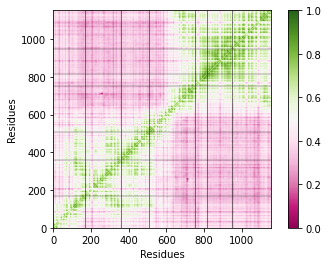

In [26]:
#2D matrix
#plt.imshow(atg_R2_scaled, cmap = 'PiYG', vmin = 0, vmax = 1)
#plt.imshow(atg_R2_1, cmap = 'PiYG', vmin = 0, vmax = 1)
plt.imshow(atg_R2_2, cmap = 'PiYG', vmin = 0, vmax = 1)
plt.axis([0,1153, 0, 1153])
# Vertical Lines
plt.plot([170, 170], [0, 1153], 'k', lw=0.5)
plt.plot([360, 360], [0, 1153], 'k', lw=0.5)
plt.plot([508, 508], [0, 1153], 'k', lw=0.5)
plt.plot([751, 751], [0, 1153], 'k', lw=0.5)
plt.plot([813, 813], [0, 1153], 'k', lw=0.5)
plt.plot([946, 946], [0, 1153], 'k', lw=0.5)
# Horizontal lines
plt.plot([0, 1153], [170, 170], 'k', lw=0.3)
plt.plot([0, 1153], [360, 360], 'k', lw=0.3)
plt.plot([0, 1153], [508, 508], 'k', lw=0.3)
plt.plot([0, 1153], [751, 751], 'k', lw=0.3)
plt.plot([0, 1153], [813, 813], 'k', lw=0.3)
plt.plot([0, 1153], [946, 946], 'k', lw=0.3)
plt.xlabel('Residues')
plt.ylabel('Residues')
plt.colorbar()
#plt.savefig("atgRNA/GC_2us_stride100_R2.png", dpi=300)
#plt.savefig("atgRNA/GC_2.5us_cluster0_R2.png", dpi=300)

In [75]:
#atg_R2 = np.load("atgRNA/GC_2us_stride100_R2_avg.npy")

## For R3 replica:

In [45]:
# Number of windows created from full simulation.
numWinds = 10

# Sampled frames per window
numSampledFrames = 10

dnap.setNumWinds(numWinds)
dnap.setNumSampledFrames(numSampledFrames)

In [3]:
dnap.loadSystem(psfFile,dcdFile3)
dnap.getU().trajectory

<ChainReader containing prod_0-100_R3_stride100_onlyProt.dcd with 1980 frames of 19593 atoms>

In [4]:
dnap.prepareNetwork()
dnap.alignTraj(inMemory=True)
dnap.findContacts(stride=50)

Preparing nodes...


Nodes are ready for network analysis.


  0%|          | 0/1980 [00:00<?, ?it/s]

We found 0 nodes with no contacts.
We found 664027 contacting pairs out of 664128 total pairs of nodes.
(That's 100.0%, by the way)


In [ ]:
#dir(dnap)

In [5]:
dnap.calcCor(ncores=12) ##only uptp 5th window = 1us

Calculating correlations...

Using window length of 198 simulation steps.
- > Using multi-core implementation with 12 threads.


Process Process-55:
Traceback (most recent call last):
  File "/home/aakash/anaconda3/envs/py37/lib/python3.7/multiprocessing/process.py", line 297, in _bootstrap
    self.run()
  File "/home/aakash/anaconda3/envs/py37/lib/python3.7/multiprocessing/process.py", line 99, in run
    self._target(*self._args, **self._kwargs)
  File "/home/aakash/anaconda3/envs/py37/lib/python3.7/site-packages/dynetan/gencor.py", line 192, in calcCorProc
    atmList = inQueue.get()
  File "/home/aakash/anaconda3/envs/py37/lib/python3.7/multiprocessing/queues.py", line 94, in get
    res = self._recv_bytes()
  File "/home/aakash/anaconda3/envs/py37/lib/python3.7/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/home/aakash/anaconda3/envs/py37/lib/python3.7/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/home/aakash/anaconda3/envs/py37/lib/python3.7/multiprocessing/connection.py", line 379, in _recv
    chunk = rea

KeyboardInterrupt: 

## Accessing GC and saving as np array

In [6]:
n5_R3 = ()
n5_R3 = dnap.corrMatAll

In [7]:
print(n5_R3.shape)

(10, 1153, 1153)


In [11]:
print(n5_R3[5])

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [8]:
np.save("atgRNA/GC_2us_stride100_R3.npy", n5_R3) # only first 1 us
#np.save("atgRNA/GC_2us_cluster0_R3.npy", n5_R3)

In [9]:
# n6_R3 = np.load("atgRNA/GC_2us_cluster0_R3.npy")
# print(n6_R3.shape)

In [12]:
n6_R3 = np.array(n5_R3)
print(n6_R3[0].shape)
print(n6_R3[1].shape)

(1153, 1153)
(1153, 1153)


In [71]:
#n6_R3 = np.load("atgRNA/GC_2us_stride100_R3.npy")

In [13]:
#atg_R3 = (n6_R3[0]+n6_R3[1]+n6_R3[2]+n6_R3[3]+n6_R3[4]+n6_R3[5]+n6_R3[6]+n6_R3[7]+n6_R3[8]+n6_R3[9]) / 10 ## avg corr from 2 windows
#atg_R3 = (n6_R3[0]+n6_R3[1]) / 2 ## avg corr from 2 windows
atg_R3_1 = (n6_R3[0]+n6_R3[1]+n6_R3[2]+n6_R3[3]+n6_R3[4]) / 5 ## for 1st 1us
atg_R3_2 = (n6_R3[0]+n6_R3[1]+n6_R3[2]) / 3 ## for 1st 600ns
# np.shape(atg_R3)
# print(atg_R3)
#np.save("atgRNA/GC_2us_stride100_R3_avg.npy", atg_R3)
#np.save("atgRNA/GC_2us_cluster0_R3_avg.npy", atg_R3)

In [14]:
# print(np.load("atgRNA/GC_2us_cluster0_R3_avg.npy"))

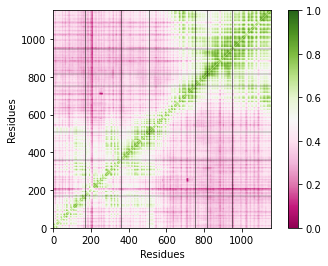

In [16]:
#2D matrix
#plt.imshow(atg_R3_scaled, cmap = 'PiYG', vmin = 0, vmax = 1)
#plt.imshow(atg_R3_1, cmap = 'PiYG', vmin = 0, vmax = 1)
plt.imshow(atg_R3_2, cmap = 'PiYG', vmin = 0, vmax = 1)
plt.axis([0,1153, 0, 1153])
# Vertical Lines
plt.plot([170, 170], [0, 1153], 'k', lw=0.5)
plt.plot([360, 360], [0, 1153], 'k', lw=0.5)
plt.plot([508, 508], [0, 1153], 'k', lw=0.5)
plt.plot([751, 751], [0, 1153], 'k', lw=0.5)
plt.plot([813, 813], [0, 1153], 'k', lw=0.5)
plt.plot([946, 946], [0, 1153], 'k', lw=0.5)
# Horizontal lines
plt.plot([0, 1153], [170, 170], 'k', lw=0.3)
plt.plot([0, 1153], [360, 360], 'k', lw=0.3)
plt.plot([0, 1153], [508, 508], 'k', lw=0.3)
plt.plot([0, 1153], [751, 751], 'k', lw=0.3)
plt.plot([0, 1153], [813, 813], 'k', lw=0.3)
plt.plot([0, 1153], [946, 946], 'k', lw=0.3)
plt.xlabel('Residues')
plt.ylabel('Residues')
plt.colorbar()
#plt.savefig("atgRNA/GC_2us_stride100_R3.png", dpi=300)
#plt.savefig("atgRNA/GC_2.5us_cluster0_R3.png", dpi=300)

In [80]:
# atg_R3 = np.load("atgRNA/GC_2us_stride100_R3_avg.npy")

# Averaging over reps:

In [56]:
atgRNA = (atg_R1_1 + atg_R2_1 + atg_R3_1) / 3

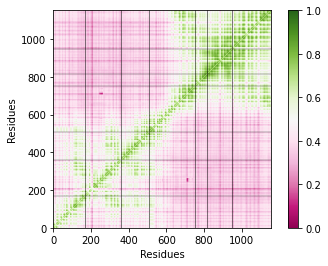

In [30]:
#2D matrix
plt.imshow(atgRNA, cmap = 'PiYG', vmin = 0, vmax = 1)
plt.axis([0,1153, 0, 1153])
# Vertical Lines
plt.plot([170, 170], [0, 1153], 'k', lw=0.5)
plt.plot([360, 360], [0, 1153], 'k', lw=0.5)
plt.plot([508, 508], [0, 1153], 'k', lw=0.5)
plt.plot([751, 751], [0, 1153], 'k', lw=0.5)
plt.plot([813, 813], [0, 1153], 'k', lw=0.5)
plt.plot([946, 946], [0, 1153], 'k', lw=0.5)
# Horizontal lines
plt.plot([0, 1153], [170, 170], 'k', lw=0.3)
plt.plot([0, 1153], [360, 360], 'k', lw=0.3)
plt.plot([0, 1153], [508, 508], 'k', lw=0.3)
plt.plot([0, 1153], [751, 751], 'k', lw=0.3)
plt.plot([0, 1153], [813, 813], 'k', lw=0.3)
plt.plot([0, 1153], [946, 946], 'k', lw=0.3)
plt.xlabel('Residues')
plt.ylabel('Residues')
plt.colorbar()
plt.savefig("atgRNA/GC_600ns_stride100_atgRNA.png", dpi=300)
#plt.savefig("atgRNA/GC_2.5us_cluster0_atgRNA.png", dpi=300)

## Distribution comparison:

In [57]:
tgRNA_flat = tgRNA.flatten()
crRNA_flat = crRNA.flatten()
atgRNA_flat = atgRNA.flatten()

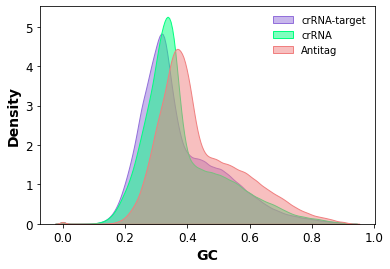

In [58]:
#plt.figure(figsize=(5,7))
ax = sb.kdeplot(tgRNA_flat, color="mediumpurple", shade=True, alpha=0.5, linewidth=1, label = 'crRNA-target')
ax = sb.kdeplot(crRNA_flat, color="springgreen", shade=True, alpha=0.5, linewidth=1, label = 'crRNA')
ax = sb.kdeplot(atgRNA_flat, color="lightcoral", shade=True, alpha=0.5, linewidth=1, label = 'Antitag')
#Setting the border of the box
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
#plt.axis([6500, 8500, 0, 0.0025])
# plt.xlim(4000, 6500)
plt.xlabel("GC", fontname = 'Arial', fontsize = 14, fontweight = 'bold')
plt.ylabel("Density", fontname = 'Arial', fontsize = 14, fontweight = 'bold')
plt.xticks(fontname = 'Arial', fontsize = 12)
plt.yticks(fontname = 'Arial', fontsize = 12)
plt.legend(frameon=False)
#plt.savefig("GC-Distribution.png", dpi=600)
plt.savefig("GC-1us-cr_tg_atg-Distribution.png", dpi=600)

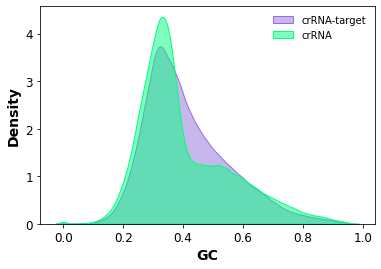

In [106]:
#plt.figure(figsize=(5,7))
ax = sb.kdeplot(tgRNA_flat, color="mediumpurple", shade=True, alpha=0.5, linewidth=1, label = 'crRNA-target')
ax = sb.kdeplot(crRNA_flat, color="springgreen", shade=True, alpha=0.5, linewidth=1, label = 'crRNA')
#Setting the border of the box
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
#plt.axis([6500, 8500, 0, 0.0025])
# plt.xlim(4000, 6500)
plt.xlabel("GC", fontname = 'Arial', fontsize = 14, fontweight = 'bold')
plt.ylabel("Density", fontname = 'Arial', fontsize = 14, fontweight = 'bold')
plt.xticks(fontname = 'Arial', fontsize = 12)
plt.yticks(fontname = 'Arial', fontsize = 12)
plt.legend(frameon=False)
#plt.savefig("GC-Distribution.png", dpi=600)
plt.savefig("GC-2.5us-crRNA_tgRNA_cluster0-Distribution.png", dpi=600)